# Hierarchical Clustering with Autoencoder Dimensionality Reduction

This notebook performs hierarchical clustering on preprocessed data, using an autoencoder for dimensionality reduction.

## Load Preprocessed Data

Load the preprocessed data from 'preprocessed_data.csv' using pandas.

In [33]:
import pandas as pd

# Load the preprocessed data
data = pd.read_csv('cm1_preprocessed.csv')

print("Data shape:", data.shape)
data.head()

Data shape: (498, 22)


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.0250,0.00590,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484,False
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.0125,0.00295,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000,True
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.0125,0.00000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689,False
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267,False
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112,False


## Perform Dimensionality Reduction with Autoencoders

Build and train an autoencoder using TensorFlow/Keras to reduce the dimensionality of the data.

In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.values)

# Define autoencoder architecture
input_dim = X_scaled.shape[1]
encoding_dim = 10  # You can adjust this value

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=1)

# Get the reduced-dimensional representation
X_reduced = encoder.predict(X_scaled)
print("Reduced data shape:", X_reduced.shape)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6953 - val_loss: 1.7418
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6953 - val_loss: 1.7418
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5242 - val_loss: 1.2328
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5242 - val_loss: 1.2328
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3594 - val_loss: 0.9820
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3594 - val_loss: 0.9820
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2726 - val_loss: 0.9099
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2726 - val_loss: 0.9099
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2401 - val_loss: 0.8912
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2401 - val_loss: 0.8912
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2203 - val_loss: 0.8841
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2203 - val_loss:

## Apply Hierarchical Clustering

Use the reduced-dimensional data to perform hierarchical clustering using scipy's linkage and fcluster methods.

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering
Z = linkage(X_reduced, method='ward')

# Assign cluster labels
max_clusters = 4  # You can adjust this value
cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')

print("Cluster labels:", np.unique(cluster_labels))

Cluster labels: [1 2 3 4]


## Visualize Clustering Results

Visualize the clustering results using a dendrogram and scatter plots of the reduced data.

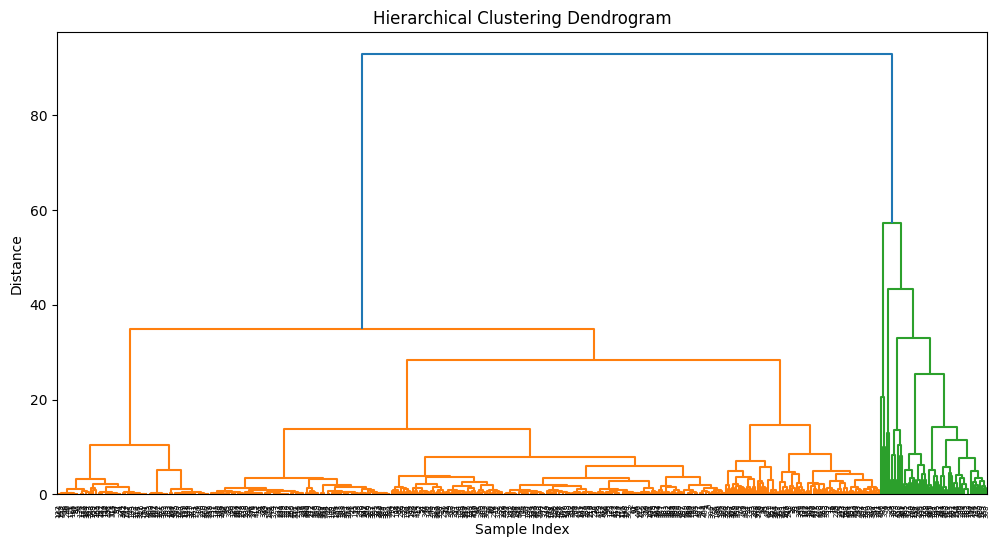

In [36]:
import matplotlib.pyplot as plt

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

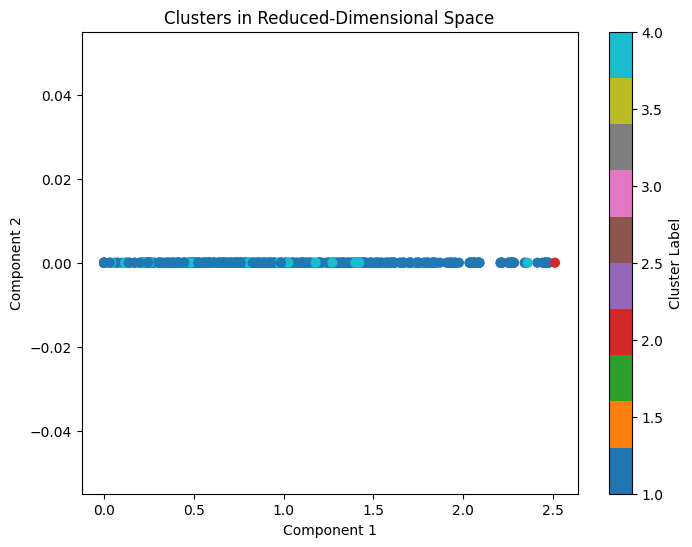

In [37]:
# Scatter plot of reduced data colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='tab10', s=40)
plt.title('Clusters in Reduced-Dimensional Space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Extract and Display Important Features

Extract and display the most important features based on encoder input weights.

In [38]:
import numpy as np
feature_names = data.columns.tolist()
# Get weights from input to first encoder layer
weights = encoder.layers[1].get_weights()[0]  # shape: (input_dim, 64)
importance = np.sum(np.abs(weights), axis=1)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top important features from autoencoder:")
display(importance_df.head(10))

Top important features from autoencoder:


,Feature,Importance
16,uniq_Op,10.171955
6,l,9.936831
11,t,9.918232
8,i,9.882616
21,defects,9.704212
15,locCodeAndComment,9.604183
13,lOComment,9.481806
1,v(g),9.444275
7,d,9.215008
18,total_Op,9.184295


## Handle Class Imbalance with SMOTEENN

Apply SMOTEENN to balance the classes in the dataset.

In [39]:
!pip install imblearn

In [41]:
from imblearn.combine import SMOTEENN

# Separate features and target
X = data.drop('defects', axis=1)
y = data['defects']

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Combine resampled features and target into a DataFrame
resampled_data = X_resampled.copy()
resampled_data['defects'] = y_resampled

# Save to CSV
resampled_data.to_csv('smoteenn_resampled_data.csv', index=False)

print('Original class distribution:')
print(y.value_counts())
print('Resampled class distribution:')
print(pd.Series(y_resampled).value_counts())
print('Resampled data saved to smoteenn_resampled_data.csv')

Original class distribution:
defects
False    449
True      49
Name: count, dtype: int64
Resampled class distribution:
defects
True     426
False    297
Name: count, dtype: int64
Resampled data saved to smoteenn_resampled_data.csv
